In [1]:
# import geopandas as gpd
# from geopandas.tools import sjoin
import pandas as pd
import matplotlib.pyplot as plt
#from fiona.crs import from_epsg
#from descartes.patch import PolygonPatch
import seaborn as sns
import random

In [2]:
data = pd.read_csv('alldatapoints.csv')


In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.insert(0, 'id', range(0, 0+len(data)))


In [4]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36240 entries, 0 to 36239
Data columns (total 13 columns):
id                            36240 non-null int32
longitude                     36240 non-null float64
latitude                      36240 non-null float64
month                         36240 non-null int64
hour                          36240 non-null float64
day                           36240 non-null int64
local_authority_(district)    36240 non-null int64
1st_road_class                36240 non-null int64
1st_road_number               36240 non-null int64
speed_limit                   36240 non-null int64
accident                      36240 non-null int64
weather_conditions            36240 non-null int64
junction_detail               36240 non-null int64
dtypes: float64(3), int32(1), int64(9)
memory usage: 3.7 MB


In [27]:
feature_cols=[
 'longitude',
 'latitude',
 'day',
 'local_authority_(district)',
 '1st_road_class',
 '1st_road_number',
 'speed_limit',
    'weather_conditions',
    'junction_detail'
  ]

X = data[feature_cols] # Features
y = data.accident


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [29]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Muskan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
from sklearn import metrics
#cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.755960264901
Precision: 0.530735235034
Recall: 0.288743169399


In [31]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.968929359823


Feature ranking:
1. feature 3 (0.371959)
2. feature 2 (0.240345)
3. feature 1 (0.169105)
4. feature 0 (0.134147)
5. feature 5 (0.037359)
6. feature 6 (0.014566)
7. feature 8 (0.014243)
8. feature 4 (0.010353)
9. feature 7 (0.007923)


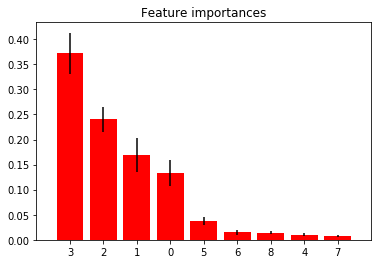

In [33]:
import numpy as np

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()